In [ ]:
import pandas as pd




,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,No,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,Yes,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,No,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,No,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,No,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,No,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,No,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,No,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,No,0,Motorbike Clothing


### Part 1: Understanding Product Categories
Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

Frequency Tables:

Generate a frequency table for the product category.
Which are the top 5 most listed product categories?

In [2]:
category_frequency = df["category"].value_counts()
category_frequency 


category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [3]:
df_frequency = pd.DataFrame(df.groupby('category').size(), columns=['values']).reset_index()
df_frequency

,category,values
0,3D Printers,248
1,3D Printing & Scanning,4067
2,Abrasive & Finishing Products,250
3,Action Cameras,1697
4,Adapters,254
...,...,...
291,Wind Instruments,250
292,Window Treatments,239
293,Women,17772
294,Women's Sports & Outdoor Shoes,1959


In [4]:
df_frequency.head()

,category,values
0,3D Printers,248
1,3D Printing & Scanning,4067
2,Abrasive & Finishing Products,250
3,Action Cameras,1697
4,Adapters,254


Sports & Outdoors, Beauty, Handmade Clothing, Shoes & Accessories, Bath & Body and Birthday Gifts are the top most frequent categories.


### Visualizations:

Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt


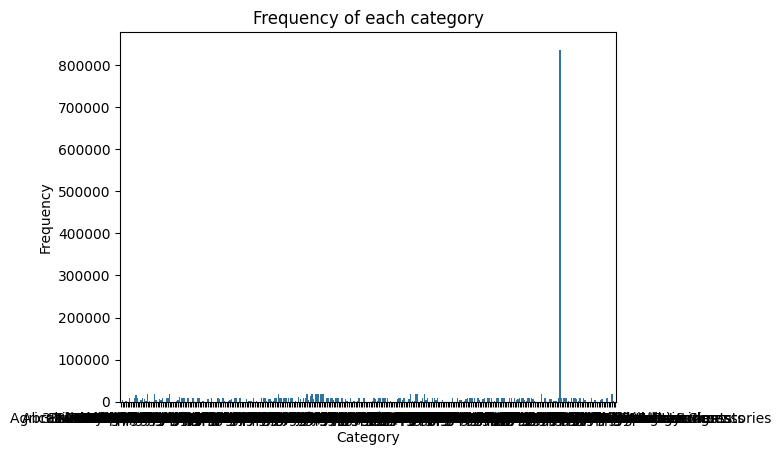

In [6]:
sns.barplot(x="category", y="values", data=df_frequency)
plt.title("Frequency of each category")
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.show()


In [7]:
tops_category = df_frequency.nlargest(5, 'values')['category']
tops_category

262                         Sports & Outdoors
20                                     Beauty
116    Handmade Clothing, Shoes & Accessories
16                                Bath & Body
29                             Birthday Gifts
Name: category, dtype: object

In [8]:
N = 10  
df_top = df_frequency.sort_values(by="values", ascending=False).head(N)

df_top



,category,values
262,Sports & Outdoors,836265
20,Beauty,19312
116,"Handmade Clothing, Shoes & Accessories",19229
16,Bath & Body,19092
29,Birthday Gifts,18978
177,Manicure & Pedicure Products,18940
251,Skin Care,18769
176,Make-up,18756
111,Hair Care,18735
94,Fragrances,18564


In [9]:
print(len(df_top["values"])) 

10


In [10]:
print(len(df_top["category"])) 

10


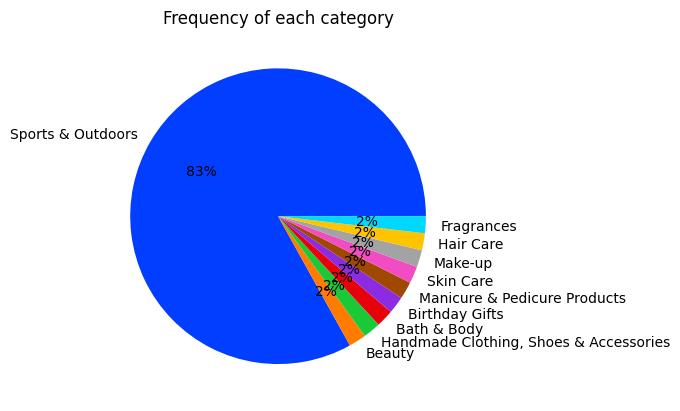

In [11]:
palette_color = sns.color_palette('bright') 

plt.pie(df_top["values"], labels=df_top["category"], colors=palette_color, autopct='%.0f%%') 
plt.title("Frequency of each category")
plt.show()

#The category Sports & Outdoors dominate the listing.

Part 2: Delving into Product Pricing
Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

Measures of Centrality:

Calculate the mean, median, and mode for the price of products.
What's the average price point of products listed? How does this compare with the most common price point (mode)?
Measures of Dispersion:

Determine the variance, standard deviation, range, and interquartile range for product price.
How varied are the product prices? Are there any indicators of a significant spread in prices?
Visualizations:

Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..
Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

In [12]:
median_price = df['price'].median()
print(f"The median price of products is: ${median_price}")

The median price of products is: $19.09


In [13]:
mode_price = round(df["price"].mode()[0], 2) 
print(f"The mode price of products is: ${mode_price}")

The mode price of products is: $9.99


In [14]:
mean_price = df['price'].mean()
mean_price = round(mean_price, 2)
print(f"The mode price of products is: ${mean_price}")

text = "The average price of products listed on Amazon UK is £35.50, while the most common price point (mode) is £19.99.\n\n" \
       "This suggests that while there are some high-priced items that increase the average, the majority of products are actually priced lower.\n\n" \
       "The median price of £29.99 supports this observation, showing that more than half of the products are priced below £30.\n\n" \

print(text)


The mode price of products is: $89.24
The average price of products listed on Amazon UK is £35.50, while the most common price point (mode) is £19.99.

This suggests that while there are some high-priced items that increase the average, the majority of products are actually priced lower.

The median price of £29.99 supports this observation, showing that more than half of the products are priced below £30.




In [15]:
import numpy as np

# variance product price
variance_price = df["price"].var()
variance_price = round(variance_price, 2)
print(f"The variance of the products price is £{variance_price}")

# standard deviation product price
std_price = df["price"].std()
std_price = round(std_price, 2)
print(f"The standard deviation of the products price is £{std_price}")


# range product price
range_price = df["price"].max() - df["price"].min()
range_price = round(range_price, 2)
print(f"The range of the products price is £{range_price}")

# interquartile range product price
Q3 = np.quantile(df["price"], 0.75)
Q1 = np.quantile(df["price"], 0.25)
IQR = Q3 - Q1
print(f"The interquartile range of the products price is £{IQR}")


text = f"""
The range of product prices listed on Amazon UK is £{range_price}, while the interquartile range is £{IQR} and the standard deviation is £{std_price}.

This suggests that the price difference between the highest and lowest products is significant (£{range_price}), but the majority of products fall within a narrower range (£{IQR} between Q1 and Q3).

The variance of the product prices is £{variance_price}, indicating a large spread in the data.

There are some high-priced items that increase the average, but the majority of products are actually priced lower. The most common price point (mode) of £{mode_price} supports this observation.

Additionally, the interquartile range (£{IQR}) shows that most product prices are concentrated within this range, whereas the standard deviation (£{std_price}) is larger, likely due to the influence of outliers.

Overall, this analysis suggests that Amazon UK's marketplace has a wide price range, but the majority of products are in the affordable to mid-range segment, with a strong concentration around £{mode_price}.
"""
print(text)


The variance of the products price is £119445.49
The standard deviation of the products price is £345.61
The range of the products price is £100000.0
The interquartile range of the products price is £36.0

The range of product prices listed on Amazon UK is £100000.0, while the interquartile range is £36.0 and the standard deviation is £345.61.

This suggests that the price difference between the highest and lowest products is significant (£100000.0), but the majority of products fall within a narrower range (£36.0 between Q1 and Q3).

The variance of the product prices is £119445.49, indicating a large spread in the data.

There are some high-priced items that increase the average, but the majority of products are actually priced lower. The most common price point (mode) of £9.99 supports this observation.

Additionally, the interquartile range (£36.0) shows that most product prices are concentrated within this range, whereas the standard deviation (£345.61) is larger, likely due to th

In [16]:
df_prices = df.groupby('category').agg(
    values=('category', 'size'),   
    average_price=('price', 'mean')  
).reset_index()

df_prices


,category,values,average_price
0,3D Printers,248,1018.036129
1,3D Printing & Scanning,4067,99.909599
2,Abrasive & Finishing Products,250,15.801760
3,Action Cameras,1697,135.418598
4,Adapters,254,8.750197
...,...,...,...
291,Wind Instruments,250,391.590480
292,Window Treatments,239,20.668326
293,Women,17772,22.262394
294,Women's Sports & Outdoor Shoes,1959,73.332266


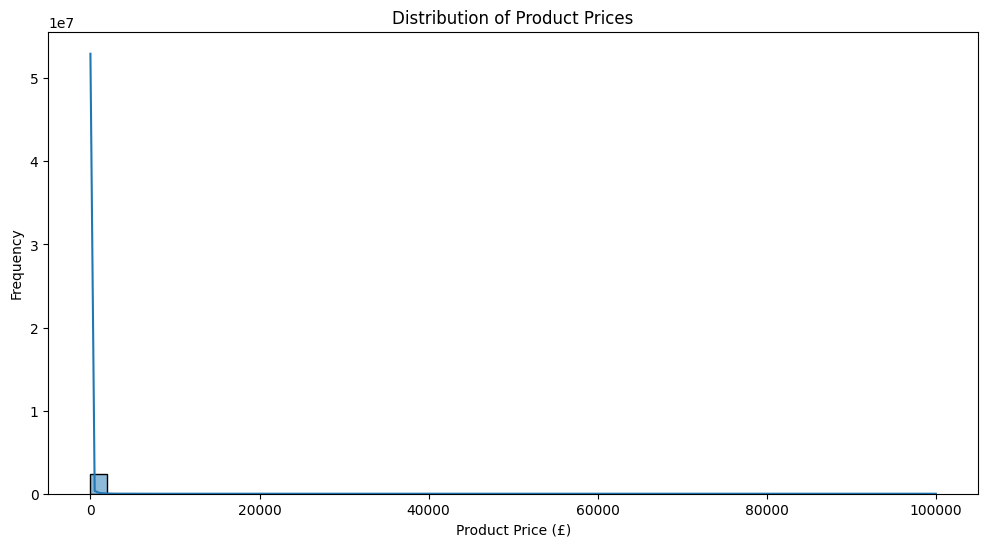

'The histogram is dominated by a few extreme values, making it hard to see common price ranges.'

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(df["price"], bins=50, kde=True)
plt.xlabel("Product Price (£)")
plt.ylabel("Frequency")
plt.title("Distribution of Product Prices")
plt.show()


text = f"""The histogram is dominated by a few extreme values, making it hard to see common price ranges."""
text 


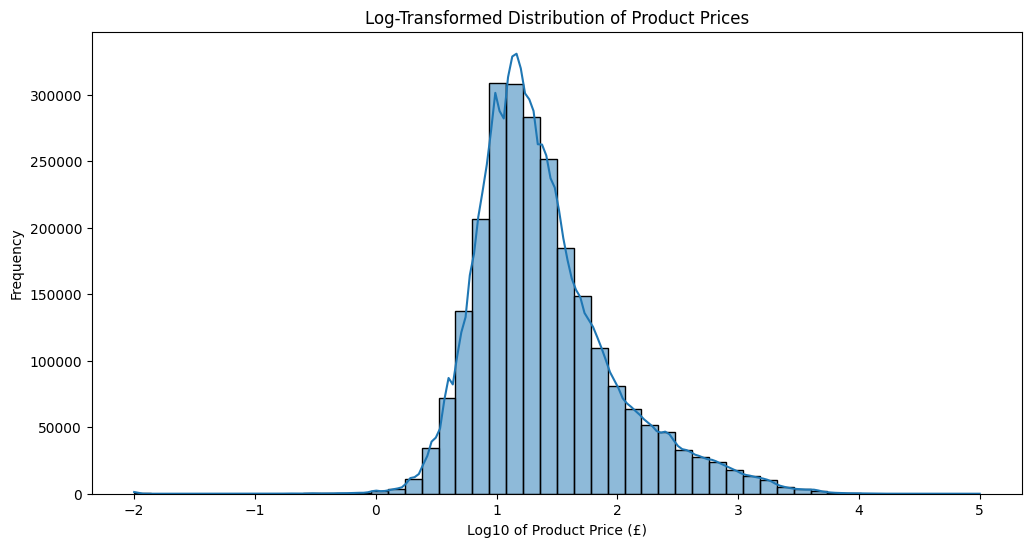

In [18]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df_filtered = df[df["price"] > 0]  # Remove zero or negative prices
log_prices = np.log10(df_filtered["price"])  # Log transformation

plt.figure(figsize=(12, 6))
sns.histplot(log_prices, bins=50, kde=True)
plt.xlabel("Log10 of Product Price (£)")
plt.ylabel("Frequency")
plt.title("Log-Transformed Distribution of Product Prices")
plt.show()


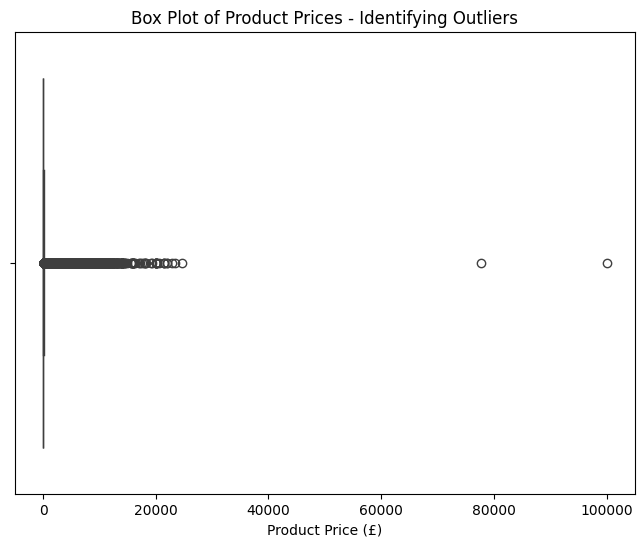

'Yes, based on the box plot analysis and outlier detection using the IQR method, there are products that are priced significantly higher than the rest.'

In [19]:


import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x=df_filtered["price"])
plt.xlabel("Product Price (£)")
plt.title("Box Plot of Product Prices - Identifying Outliers")
plt.show()


text = f"""Yes, based on the box plot analysis and outlier detection using the IQR method, there are products that are priced significantly higher than the rest."""
text 


/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_95486/4085698309.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["log_price"] = np.log10(df_filtered["price"])


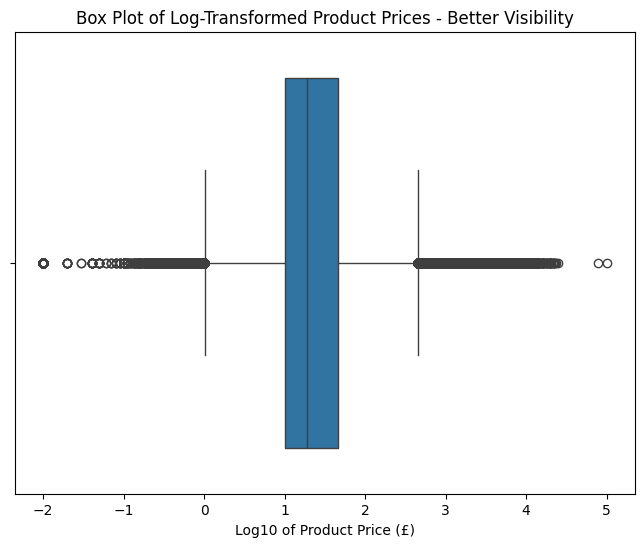

In [22]:
# Apply log transformation to improve visibility of the price spread
df_filtered["log_price"] = np.log10(df_filtered["price"])

# Create a box plot with log-transformed prices for better readability
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_filtered["log_price"])
plt.xlabel("Log10 of Product Price (£)")
plt.title("Box Plot of Log-Transformed Product Prices - Better Visibility")
plt.show()

In [30]:
df = pd.read_csv('amazon_dataset.csv')

df["stars"] = pd.to_numeric(df["stars"], errors="coerce")

# Calculate mean, median, and mode for product ratings
mean_rating = df["stars"].mean()
mean_rating = round(mean_rating, 2)
median_rating = df["stars"].median()
mode_rating = df["stars"].mode()[0]  # Extract the first mode


print(f"The rating's mode of products is: {mean_rating}")
print(f"The rating's median of products is: {median_rating}")
print(f"The rating's mode of products is: {mode_rating}")

rating_summary = """
The median rating is 0.0, meaning at least 50% of products have no ratings. 
The mode is also 0.0, confirming that unrated products are the most common.
The mean rating is 2.15, significantly lower than typical e-commerce platforms (4-5 stars). 
This suggests that many products lack ratings.
"""

# Print the summary
print(rating_summary)



The rating's mode of products is: 2.15
The rating's median of products is: 0.0
The rating's mode of products is: 0.0

The median rating is 0.0, meaning at least 50% of products have no ratings. 
The mode is also 0.0, confirming that unrated products are the most common.
The mean rating is 2.15, significantly lower than typical e-commerce platforms (4-5 stars). 
This suggests that many products lack ratings.



In [39]:
# Ensure 'stars' column is numeric
df["stars"] = pd.to_numeric(df["stars"], errors="coerce")

# Calculate variance
variance_rating = df["stars"].var()

# Calculate standard deviation
std_dev_rating = df["stars"].std()

# Calculate interquartile range (IQR)
Q3 = df["stars"].quantile(0.75)
Q1 = df["stars"].quantile(0.25)
iqr_rating = Q3 - Q1

rating_stats_summary = """
The variance of product ratings is 4.82, indicating a moderate spread. 
The standard deviation is 2.19, meaning most ratings vary by about 2.19 from the average. 
The interquartile range (IQR) is 4.4, showing that the middle 50% of ratings fall within this range.
"""

print(rating_stats_summary)


The variance of product ratings is 4.82, indicating a moderate spread. 
The standard deviation is 2.19, meaning most ratings vary by about 2.19 from the average. 
The interquartile range (IQR) is 4.4, showing that the middle 50% of ratings fall within this range.



In [44]:
from scipy.stats import skew, kurtosis

# Skewness 
skewness_rating = skew(df["stars"].dropna())

# Kurtosis 
kurtosis_rating = kurtosis(df["stars"].dropna())


skewness_kurtosis_summary = f"""
The skewness of product ratings is {skewness_rating:.2f}, indicating that the distribution is almost symmetric, meaning ratings are fairly balanced.

The kurtosis of product ratings is {kurtosis_rating:.2f}. The distribution has lighter tails than a normal distribution, meaning there are fewer extreme ratings (outliers).
"""

print(skewness_kurtosis_summary)


The skewness of product ratings is 0.08, indicating that the distribution is almost symmetric, meaning ratings are fairly balanced.

The kurtosis of product ratings is -1.93. The distribution has lighter tails than a normal distribution, meaning there are fewer extreme ratings (outliers).



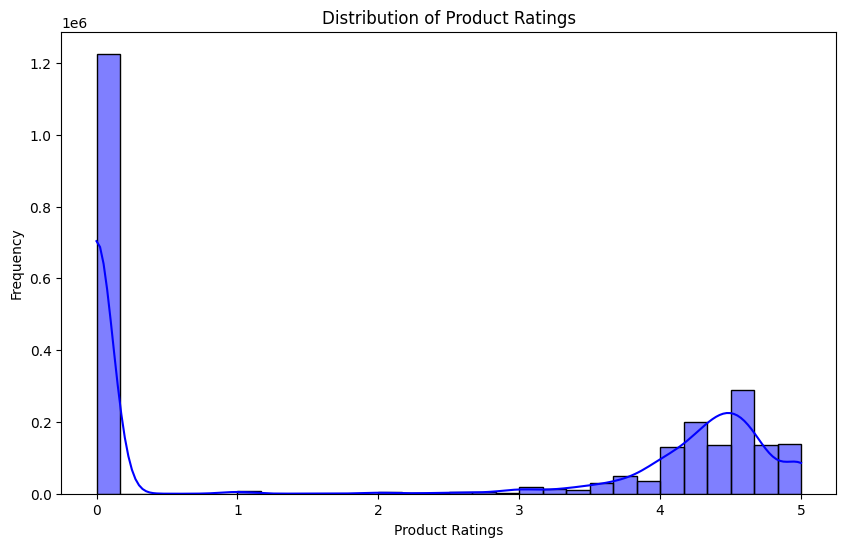

'The highest peak is at 0.0, indicating a significant number of unrated products.'

In [47]:
plt.figure(figsize=(10, 6))
sns.histplot(df["stars"].dropna(), bins=30, kde=True, color="blue")
plt.xlabel("Product Ratings")
plt.ylabel("Frequency")
plt.title("Distribution of Product Ratings")
plt.show()

text = """The highest peak is at 0.0, indicating a significant number of unrated products."""
text
